# Movie Ratings

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/HK_Central_IFC_Mall_lunch_time_Place_IFC_movies_on_showing_April-2012.JPG/320px-HK_Central_IFC_Mall_lunch_time_Place_IFC_movies_on_showing_April-2012.JPG)

## Movie Ratings dataset, contains information on 559 movies with their Rotten Tomatoes ratings, genre, budget, among other variables.

image reference: https://commons.wikimedia.org/wiki/User:Lawsenbofan

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "movieratings"

# Getting to know our data

In [2]:
movies <- read_csv("../input/movieratings/Movie-ratings.csv")
#../input/movieratings/Movie-ratings.csv
head(movies)

Rows: 559 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Film, Genre
dbl (4): Rotten_Tomatoes_Ratings, Audience_Ratings, Budget_millions, Year_of...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Film,Genre,Rotten_Tomatoes_Ratings,Audience_Ratings,Budget_millions,Year_of_release
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(500) Days of Summer,Comedy,87,81,8,2009
"10,000 B.C.",Adventure,9,44,105,2008
12 Rounds,Action,30,52,20,2009
127 Hours,Adventure,93,84,18,2010
17 Again,Comedy,55,70,20,2009
2012,Action,39,63,200,2009


We can see here  the relationship of the genre of films produced according to the year:

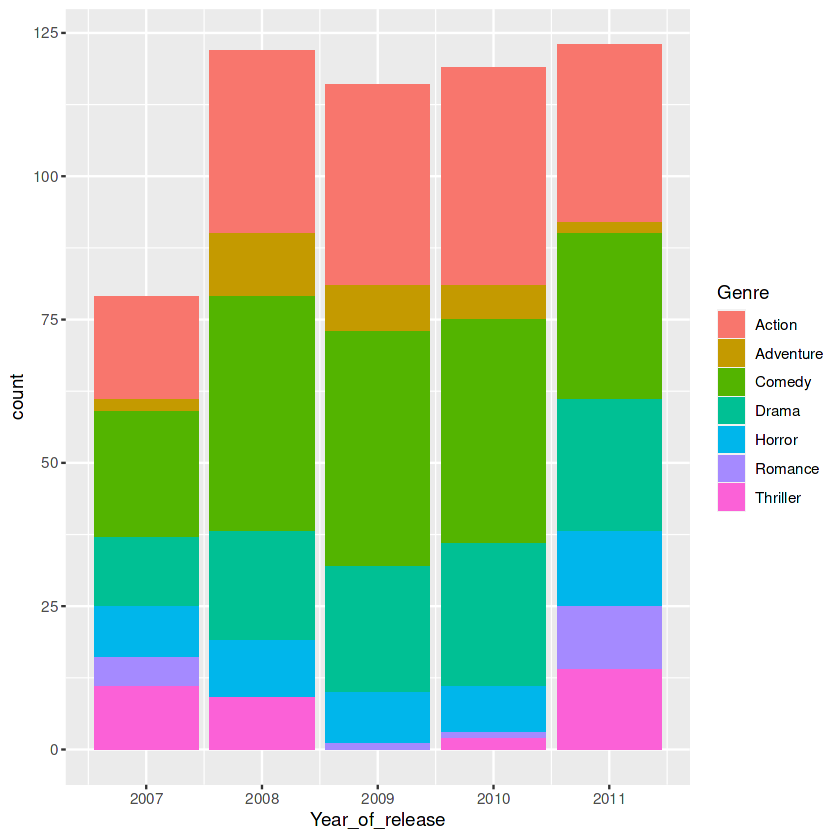

In [3]:
ggplot(data = movies) + 
  geom_bar(mapping = aes(x = Year_of_release, fill=Genre))

We can see here the budget amount per year:

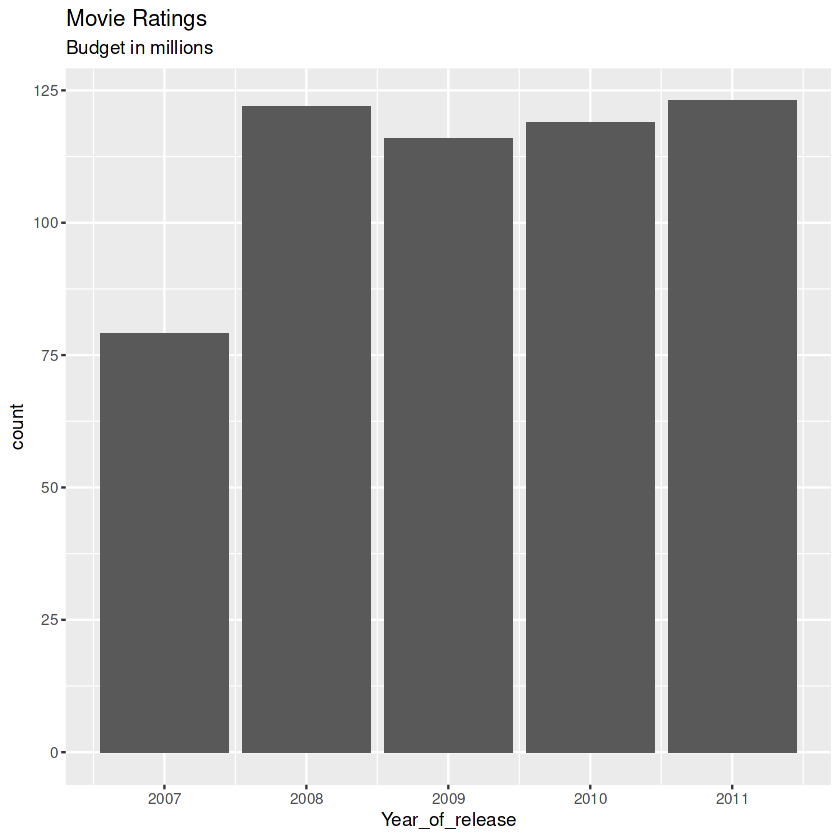

In [4]:
ggplot(data = movies) + 
  geom_bar(mapping = aes(x = Year_of_release, fill=Budget_millions))+
labs(title="Movie Ratings ", subtitle= "Budget in millions")

Budget in millions amount by and Genre:

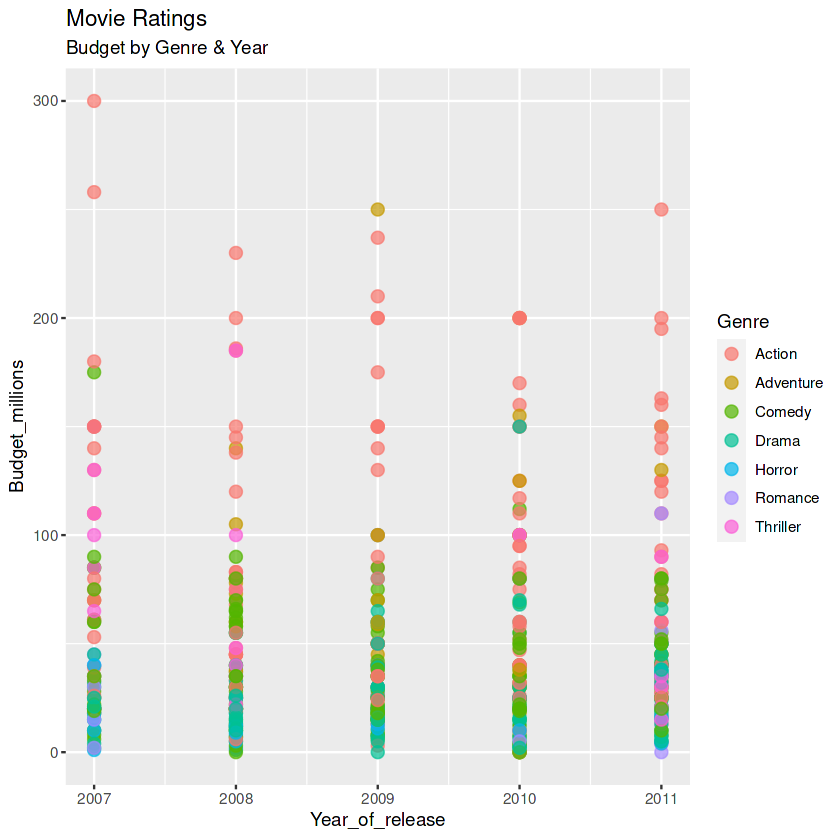

In [5]:
ggplot(data=movies, mapping=aes(x = Year_of_release, y = Budget_millions))+
  geom_point(aes(color = Genre), size = 3, alpha = 0.7) +
  labs(title="Movie Ratings", subtitle= "Budget by Genre & Year")

We might be interested in knowing the correlation between the audience score and the critic score for all the films considered.

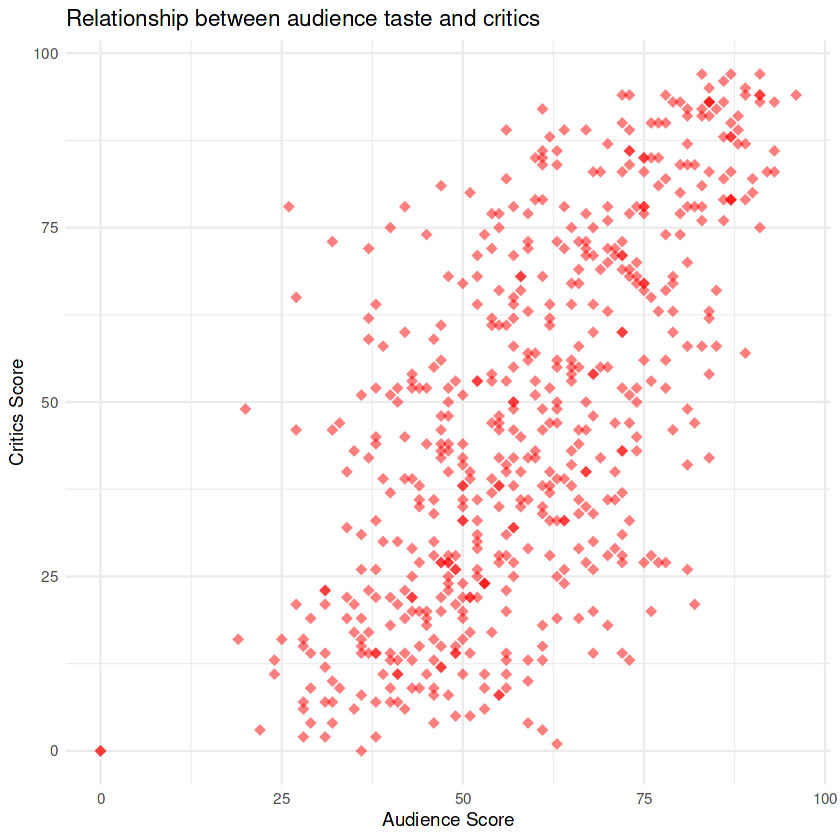

In [6]:
ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(color = 'red', fill = 'red', size = 3, shape = 18, alpha = 0.5) +
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()

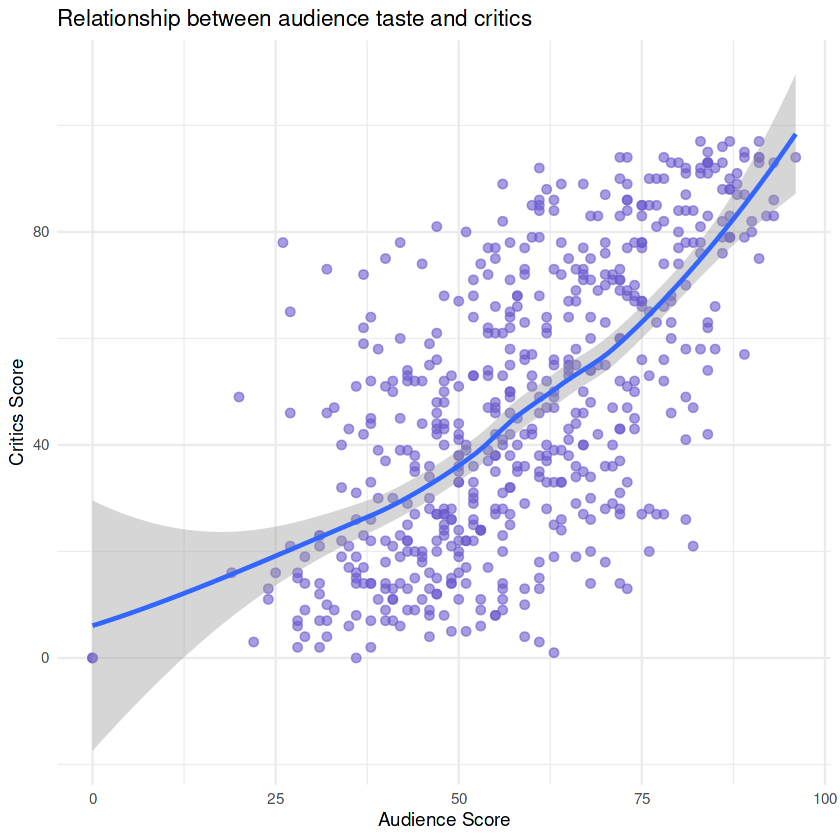

In [7]:
ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(color = 'slateblue', size = 2, alpha = 0.6) +
  geom_smooth(formula = y ~ x, method = "loess") + 
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()

We can incorporate the genre of the considered films, in order to obtain even more information from the graph:

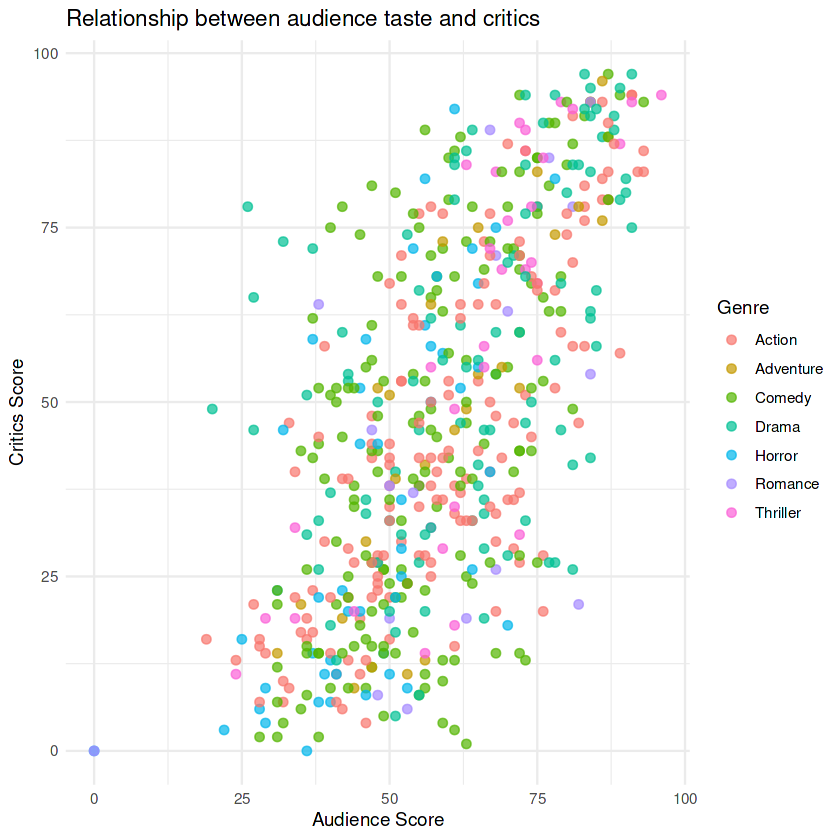

In [8]:
ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(aes(color = Genre), size = 2, alpha = 0.7) +
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()

We can incorporate information from the Budget of each film.
Movies with a larger budget are represented by a larger circle, and vice versa.

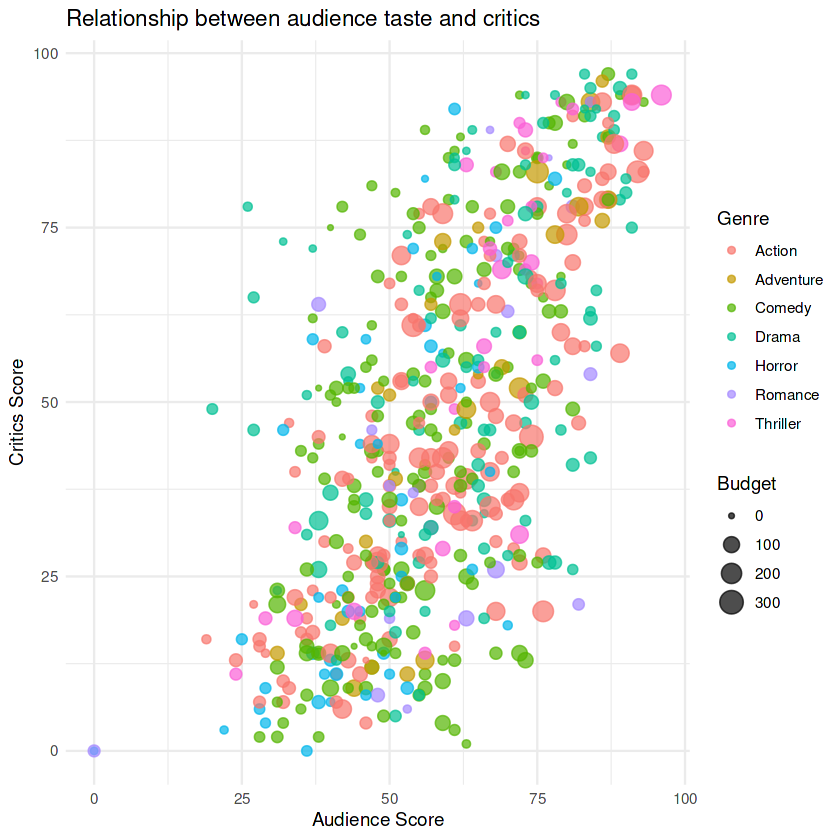

In [9]:
plot <- ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(aes(color = Genre, size = Budget_millions), alpha = 0.7) +
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()
plot$labels$colour = "Genre"
plot$labels$size = "Budget"
plot

Observations according to gender separately:

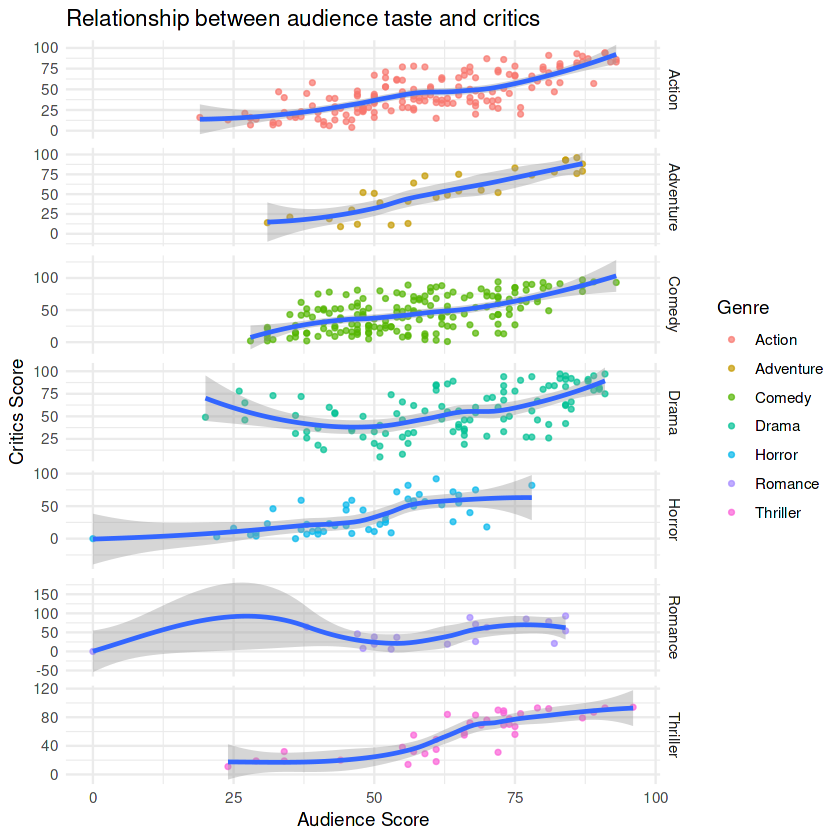

In [10]:
ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(aes(color = Genre), size = 1, alpha = 0.7) +
  geom_smooth(formula = y ~ x, method = "loess") +
  facet_grid(Genre~., scales = 'free') +
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()

We use the variable that refers to the year in which each film was released, and we incorporate it into the analysis graph:

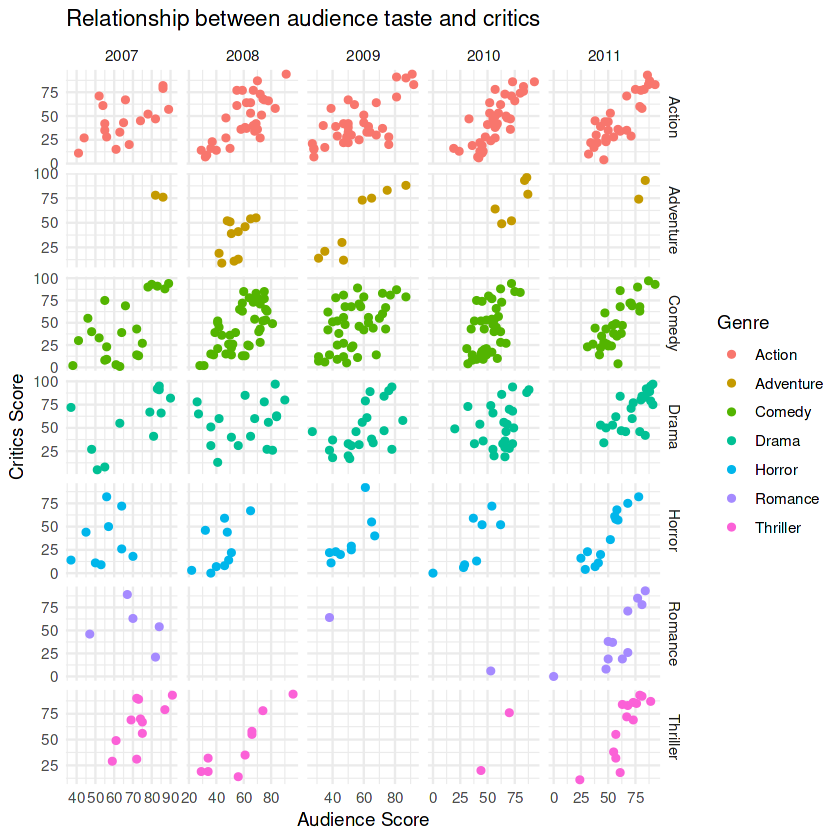

In [11]:
ggplot(data = movies, aes(x = Audience_Ratings , y = Rotten_Tomatoes_Ratings)) + 
  geom_point(aes(color = Genre), size = 1, alpha = 0.7) +
  geom_point(aes(color = Genre)) +
  facet_grid(Genre~Year_of_release, scales = 'free') +
  xlab('Audience Score') + 
  ylab('Critics Score') +
  ggtitle('Relationship between audience taste and critics') + 
  theme_minimal()